# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Yosia Aser Camme
- Email: yosiaaser5@gmail.com
- Id Dicoding: bluebird

## Persiapan

### Menyiapkan library yang dibutuhkan

Pada tahap ini, kita mengimpor berbagai library yang dibutuhkan untuk analisis data, preprocessing, modeling, dan evaluasi. Berikut adalah penjelasan masing-masing library yang diimpor:

1. pandas: Digunakan untuk manipulasi dan analisis data berbasis tabel (DataFrame).
2. seaborn: Library visualisasi data berbasis matplotlib yang menyediakan grafik statistik.
3. matplotlib.pyplot: Digunakan untuk membuat visualisasi data seperti grafik dan plot.
4. sklearn.model_selection:
    - train_test_split: Membagi dataset menjadi data latih dan data uji.
    - GridSearchCV: Melakukan pencarian hyperparameter terbaik menggunakan cross-validation.
5. sklearn.preprocessing:
    - LabelEncoder: Mengubah data kategorikal menjadi angka.
    - StandardScaler: Melakukan normalisasi fitur agar memiliki distribusi dengan mean 0 dan standar deviasi 1.
6. sklearn.metrics:
    - classification_report: Menampilkan metrik evaluasi seperti precision, recall, dan F1-score.
    - confusion_matrix: Menampilkan matriks kebingungan untuk evaluasi model.
    - accuracy_score: Menghitung akurasi model.
7. xgboost: Library untuk membangun model gradient boosting yang efisien dan cepat.
8. joblib: Digunakan untuk menyimpan dan memuat model, scaler, atau encoder yang telah dilatih.

Library ini membantu dalam seluruh proses analisis data, mulai dari persiapan data hingga evaluasi model.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb
import joblib

### Menyiapkan data yang akan digunakan

Pada tahap ini, data yang telah dibaca ditampilkan menggunakan data.head() untuk melihat beberapa baris pertama sebagai sampel. Hal ini bertujuan untuk memahami struktur data secara umum, termasuk nama kolom dan beberapa nilai awal dari setiap kolom.

In [2]:
data = pd.read_csv('data.csv', sep=';')

In [3]:
# Menampilkan 5 data teratas
print("Data Sample:")
print(data.head())

Data Sample:
   Marital_status  Application_mode  Application_order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime_evening_attendance  Previous_qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous_qualification_grade  Nacionality  Mothers_qualification  \
0                         122.0            1                     19   
1                         160.0            1                      1   
2                         122.0   

## Data Understanding

Pada tahap ini, dilakukan eksplorasi awal terhadap dataset untuk memahami struktur data, distribusi nilai, dan potensi masalah seperti missing values. Berikut adalah langkah-langkah yang dilakukan:

1. Informasi Data: Menggunakan data.info() untuk melihat jumlah kolom, tipe data, dan jumlah nilai non-null pada setiap kolom. Hal ini membantu dalam mengidentifikasi kolom dengan missing values atau tipe data yang perlu diubah.

2. Statistik Deskriptif: Menggunakan data.describe() untuk melihat statistik deskriptif seperti mean, median, standar deviasi, nilai minimum, dan maksimum dari kolom numerik. Statistik ini memberikan gambaran umum tentang distribusi data.

3. Cek Missing Values: Menggunakan data.isnull().sum() untuk menghitung jumlah missing values pada setiap kolom. Informasi ini penting untuk menentukan langkah penanganan missing values.

4. Distribusi Target: Melihat distribusi variabel target (dalam hal ini kolom Status) menggunakan value_counts() untuk mengetahui proporsi masing-masing kelas. Distribusi ini penting untuk memahami apakah dataset seimbang atau tidak.

5. Visualisasi Distribusi Target: Menggunakan sns.countplot() untuk membuat visualisasi distribusi target. Grafik ini membantu dalam memahami proporsi kelas secara visual.

Langkah-langkah ini bertujuan untuk memastikan bahwa data siap untuk tahap preprocessing dan modeling, serta untuk mengidentifikasi potensi masalah yang perlu ditangani lebih lanjut.


In [4]:
print("\nInformasi Data:")
print(data.info())


Informasi Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         

In [5]:
print("\nStatistik Data:")
print(data.describe())


Statistik Data:
       Marital_status  Application_mode  Application_order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime_evening_attendance  Previous_qualification  \
count                 4424.000000             4424.000000   
mean                     0.890823                4.577758   
std                      0.311897               10.216592   
min                      0.000000                1.000000   
25

In [6]:
print("\nCek jumlah missing values:")
print(data.isnull().sum())


Cek jumlah missing values:
Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment     

In [7]:
print("\nCek distribusi target (Dropout atau tidak):")
print(data['Status'].value_counts())


Cek distribusi target (Dropout atau tidak):
Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


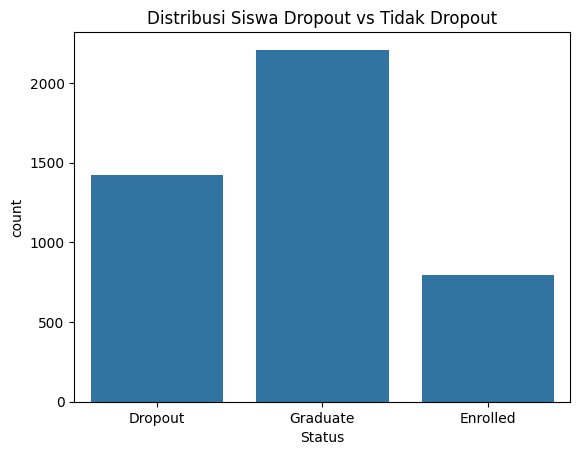

In [8]:
sns.countplot(x='Status', data=data)
plt.title('Distribusi Siswa Dropout vs Tidak Dropout')
plt.show()

Pada tahap Data Understanding, dilakukan eksplorasi awal terhadap dataset untuk memahami struktur data, distribusi nilai, dan potensi masalah seperti missing values. Berikut adalah penjelasan dari setiap output:

1. Informasi Data (data.info()):
    - Dataset memiliki 4424 baris dan 39 kolom.
    - Semua kolom memiliki jumlah nilai non-null yang sama dengan jumlah baris (4424), sehingga tidak ada missing values.
    - Tipe data pada kolom terdiri dari:
      - int64: 30 kolom (contoh: Marital_status, Application_mode, Debtor).
      - float64: 9 kolom (contoh: Previous_qualification_grade, Admission_grade, avg_grade).
    - Informasi ini menunjukkan bahwa dataset sudah bersih dari missing values, tetapi tipe data perlu diperhatikan untuk memastikan sesuai dengan kebutuhan analisis.

2. Statistik Deskriptif (data.describe()):
    - Menampilkan statistik deskriptif untuk kolom numerik, seperti:
      - Mean (rata-rata): Memberikan gambaran umum tentang nilai tengah dari setiap kolom.
      - Std (standar deviasi): Mengukur seberapa tersebar data dari rata-rata.
      - Min dan Max: Menunjukkan rentang nilai pada setiap kolom.
    - Contoh:
      - Kolom Admission_grade memiliki rata-rata 127.3 dengan nilai minimum 0 dan maksimum 200.
      - Kolom avg_grade memiliki rata-rata 12.9, yang menunjukkan rata-rata nilai siswa.

3. Cek Missing Values (data.isnull().sum()):
    - Tidak ditemukan missing values pada dataset, karena semua kolom memiliki nilai 0 pada hasil pengecekan.

4. Distribusi Target (data['Status'].value_counts()):
    - Distribusi variabel target (sebelum di-encode menjadi Dropout) menunjukkan jumlah siswa pada setiap kategori:
      - Dropout: Jumlah siswa yang keluar dari program.
      - Enrolled dan Graduate: Jumlah siswa yang masih terdaftar atau telah lulus.
    - Informasi ini penting untuk memahami apakah dataset memiliki distribusi kelas yang seimbang atau tidak.

5. Visualisasi Distribusi Target (sns.countplot()):
    - Grafik batang menunjukkan distribusi jumlah siswa pada setiap kategori target.
    - Jika terdapat ketidakseimbangan kelas (misalnya, jumlah siswa Dropout jauh lebih sedikit dibandingkan Enrolled), hal ini perlu diperhatikan saat modeling untuk menghindari bias model.

Kesimpulan:
- Dataset sudah bersih dari missing values.
- Terdapat beberapa kolom numerik dengan rentang nilai yang berbeda, sehingga normalisasi diperlukan.
- Distribusi target perlu diperhatikan untuk memastikan model dapat menangani ketidakseimbangan kelas dengan baik.

## Data Preparation / Preprocessing

Pada tahap ini, dilakukan serangkaian langkah untuk mempersiapkan data agar siap digunakan dalam proses modeling. Berikut adalah langkah-langkah yang dilakukan:

1. Encoding Target Variable:
    - Kolom Status yang berisi nilai kategorikal seperti 'Enrolled', 'Graduate', dan 'Dropout' diubah menjadi nilai numerik.
    - 'Dropout' diberi nilai 1, sedangkan nilai lainnya ('Enrolled' dan 'Graduate') diberi nilai 0.

2. Menghapus Kolom Status:
    - Setelah target variable (Dropout) dibuat, kolom Status dihapus karena tidak lagi diperlukan.

3. Feature Engineering:
    - Dibuat beberapa fitur baru untuk membantu model memahami data dengan lebih baik:
      - avg_grade: Rata-rata nilai dari Curricular_units_1st_sem_grade dan Curricular_units_2nd_sem_grade.
      - approval_rate: Rasio jumlah mata kuliah yang disetujui terhadap jumlah mata kuliah yang diambil.
    - Beberapa fitur lain seperti Age_at_enrollment, Debtor, Scholarship_holder, dan Tuition_fees_up_to_date tetap dipertahankan.

4. Cek Missing Values:
    - Dilakukan pengecekan jumlah missing values pada setiap kolom untuk memastikan data bersih.

5. Mengisi Missing Values:
    - Jika terdapat missing values, nilai tersebut diisi dengan 0 untuk menghindari error saat proses modeling.

6. Encoding Fitur Kategorikal:
    - Semua kolom dengan tipe data kategorikal diubah menjadi nilai numerik menggunakan LabelEncoder.

7. Split Features dan Target:
    - Data dipisahkan menjadi dua bagian:
      - X: Fitur (semua kolom kecuali target Dropout).
      - y: Target (kolom Dropout).

8. Normalisasi Fitur:
    - Fitur pada X dinormalisasi menggunakan StandardScaler agar memiliki distribusi dengan mean 0 dan standar deviasi 1. Hal ini membantu model bekerja lebih baik pada data dengan skala yang seragam.

9. Split Data Latih dan Uji:
    - Data dibagi menjadi data latih (X_train, y_train) dan data uji (X_test, y_test) dengan rasio 80:20 menggunakan train_test_split. Stratifikasi dilakukan berdasarkan target (y) untuk menjaga distribusi kelas tetap seimbang.

Langkah-langkah ini memastikan bahwa data dalam kondisi optimal untuk digunakan dalam proses modeling.

In [9]:
# Encode target (Status)
# Misal: 'Enrolled' = 0, 'Graduate' = 0, 'Dropout' = 1 (Dropout = 1, yang lain 0)
data['Dropout'] = data['Status'].apply(lambda x: 1 if x == 'Dropout' else 0)

In [10]:
# Hapus kolom 'Status' karena sudah diubah
data.drop(columns=['Status'], inplace=True)

In [11]:
# Feature Engineering sederhana
data['avg_grade'] = (data['Curricular_units_1st_sem_grade'] + data['Curricular_units_2nd_sem_grade']) / 2
data['approval_rate'] = (data['Curricular_units_1st_sem_approved'] + data['Curricular_units_2nd_sem_approved']) / \
                        (data['Curricular_units_1st_sem_enrolled'] + data['Curricular_units_2nd_sem_enrolled'] + 1e-5)
data['Age_at_enrollment'] = data['Age_at_enrollment']
data['Debtor'] = data['Debtor']
data['Scholarship_holder'] = data['Scholarship_holder']
data['Tuition_fees_up_to_date'] = data['Tuition_fees_up_to_date']

In [ ]:
# Cek missing values
print("\nJumlah missing values per kolom:")
print(data.isnull().sum())


Jumlah missing values per kolom:
Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollmen

In [12]:
# Mengisi missing value (kalau ada)
data.fillna(0, inplace=True)

In [13]:
# Encode semua fitur kategorikal
categorical_cols = data.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [ ]:
# Split features dan target
X = data.drop(columns=['Dropout'])
y = data['Dropout']

In [ ]:
# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split train test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

## Modeling

Pada tahap ini, dilakukan proses pembuatan model machine learning untuk memprediksi apakah seorang siswa akan dropout atau tidak. Berikut adalah langkah-langkah yang dilakukan:

1. Membuat Model Awal:
    - Model yang digunakan adalah XGBClassifier dari library XGBoost.
    - Model ini dipilih karena kemampuannya yang baik dalam menangani data dengan fitur yang kompleks dan performa yang tinggi pada berbagai jenis dataset.
    - Parameter awal yang digunakan meliputi:
      - objective='binary:logistic': Model digunakan untuk klasifikasi biner.
      - eval_metric='logloss': Metode evaluasi yang digunakan adalah log loss.
      - use_label_encoder=False: Tidak menggunakan label encoder bawaan XGBoost.
      - random_state=42: Untuk memastikan hasil yang konsisten.

2. Hyperparameter Tuning:
    - Dilakukan pencarian hyperparameter terbaik menggunakan GridSearchCV.
    - Parameter yang dicari meliputi:
      - max_depth: Kedalaman maksimum pohon (3, 5, 7).
      - learning_rate: Kecepatan pembelajaran (0.01, 0.1, 0.2).
      - n_estimators: Jumlah pohon (100, 200).
      - subsample: Proporsi sampel yang digunakan untuk setiap pohon (0.8, 1).
      - colsample_bytree: Proporsi fitur yang digunakan untuk setiap pohon (0.8, 1).
    - GridSearchCV menggunakan cross-validation sebanyak 3 kali untuk memastikan model tidak overfitting.

3. Training Model:
    - Model dilatih menggunakan data latih (X_train dan y_train) dengan kombinasi hyperparameter yang telah ditentukan.
    - Proses ini memakan waktu karena setiap kombinasi hyperparameter diuji menggunakan cross-validation.

4. Model Terbaik:
    - Setelah proses tuning selesai, model dengan kombinasi hyperparameter terbaik dipilih sebagai model final.
    - Model ini disimpan menggunakan joblib agar dapat digunakan kembali tanpa perlu melatih ulang.

Langkah-langkah ini bertujuan untuk mendapatkan model dengan performa terbaik yang dapat memprediksi dropout siswa secara akurat.


In [18]:
# Membuat model awal
model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

In [19]:
# Hyperparameter tuning sederhana
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

In [20]:
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=1
)

In [21]:
# Training
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


c:\Users\Shinkai\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:02:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1]},
             verbose=1)

In [22]:
# Best model
best_model = grid_search.best_estimator_

In [23]:
# Simpan model
joblib.dump(best_model, 'model_dropout_xgboost.pkl')

# Simpan scaler dan label encoder
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')

print("\nModel, Scaler, dan Label Encoders berhasil disimpan!")


Model, Scaler, dan Label Encoders berhasil disimpan!


## Evaluation

Pada tahap evaluasi, dilakukan pengujian terhadap performa model menggunakan data uji (X_test dan y_test). Berikut adalah langkah-langkah evaluasi yang dilakukan:

1. Prediksi Data Uji:
    - Model terbaik yang telah diperoleh dari proses hyperparameter tuning digunakan untuk memprediksi label pada data uji.
    - Prediksi dilakukan menggunakan metode predict() untuk mendapatkan label kelas, dan predict_proba() untuk mendapatkan probabilitas prediksi.

2. Classification Report:
    - Menggunakan classification_report untuk menampilkan metrik evaluasi seperti precision, recall, F1-score, dan support untuk setiap kelas.
    - Metrik ini memberikan gambaran tentang performa model dalam memprediksi masing-masing kelas.

3. Confusion Matrix:
    - Menggunakan confusion_matrix untuk menampilkan matriks kebingungan yang menunjukkan jumlah prediksi benar dan salah untuk setiap kelas.
    - Matriks ini membantu dalam memahami kesalahan prediksi model.

4. Akurasi Model:
    - Menggunakan accuracy_score untuk menghitung akurasi model, yaitu persentase prediksi yang benar dibandingkan dengan total data uji.
    - Akurasi memberikan gambaran umum tentang performa model secara keseluruhan.

Langkah-langkah ini bertujuan untuk mengevaluasi seberapa baik model dapat memprediksi dropout siswa berdasarkan data uji yang tersedia.

In [30]:
# Predict
y_pred = best_model.predict(X_test)

# Evaluasi
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAkurasi Model setelah tuning: {accuracy}")



Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       601
           1       0.86      0.76      0.81       284

    accuracy                           0.88       885
   macro avg       0.88      0.85      0.86       885
weighted avg       0.88      0.88      0.88       885


Confusion Matrix:
[[567  34]
 [ 68 216]]

Akurasi Model setelah tuning: 0.8847457627118644


1. Classification Report:
    - Precision:
      - Untuk kelas 0 (tidak dropout), precision adalah 0.89, yang berarti 89% dari prediksi siswa tidak dropout benar.
      - Untuk kelas 1 (dropout), precision adalah 0.86, yang berarti 86% dari prediksi siswa dropout benar.
    - Recall:
      - Untuk kelas 0, recall adalah 0.94, yang berarti 94% dari siswa yang sebenarnya tidak dropout berhasil terdeteksi.
      - Untuk kelas 1, recall adalah 0.76, yang berarti 76% dari siswa yang sebenarnya dropout berhasil terdeteksi.
    - F1-Score:
      - Untuk kelas 0, F1-score adalah 0.92, yang menunjukkan keseimbangan antara precision dan recall.
      - Untuk kelas 1, F1-score adalah 0.81, yang menunjukkan keseimbangan antara precision dan recall.
    - Akurasi Keseluruhan:
      - Akurasi model adalah 0.88 (88%), yang berarti model memprediksi dengan benar 88% dari total data uji.

2. Confusion Matrix:
    - True Positives (TP): 216 (siswa yang sebenarnya dropout dan diprediksi dropout).
    - True Negatives (TN): 567 (siswa yang sebenarnya tidak dropout dan diprediksi tidak dropout).
    - False Positives (FP): 34 (siswa yang sebenarnya tidak dropout tetapi diprediksi dropout).
    - False Negatives (FN): 68 (siswa yang sebenarnya dropout tetapi diprediksi tidak dropout).

3. Kesimpulan:
    - Model memiliki performa yang baik dengan akurasi 88%.
    - Precision dan recall untuk kelas 0 lebih tinggi dibandingkan kelas 1, yang menunjukkan model lebih baik dalam mendeteksi siswa yang tidak dropout dibandingkan siswa yang dropout.
    - Performa pada kelas 1 (dropout) masih dapat ditingkatkan, terutama pada recall, untuk mengurangi jumlah siswa dropout yang tidak terdeteksi.